# Providing data-driven suggestions for HR
Description and deliverables
The project stands for the purpose of analyzing the data and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, we'll have artifacts that would be able to present to the HR department. A complete code notebook provided here which uses a regression model and machine learning model to predict whether or not an employee will leave the company. The project shows both approaches, with keeping in mond the data leakage issue.

In deliverables, we'll include the model evaluation (and interpretation if applicable), a data visualization(s) of choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.

# Understand the business scenario and problem
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

# Familiarizing with the HR dataset
The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

Note: For more information about the data, refer to its source on Kaggle.

Variable |Description | -----|-----| satisfaction_level|Employee-reported job satisfaction level [0–1]| last_evaluation|Score of employee's last performance review [0–1]| number_project|Number of projects employee contributes to| average_monthly_hours|Average number of hours employee worked per month| time_spend_company|How long the employee has been with the company (years) Work_accident|Whether or not the employee experienced an accident while at work left|Whether or not the employee left the company promotion_last_5years|Whether or not the employee was promoted in the last 5 years Department|The employee's department salary|The employee's salary (U.S. dollars)

# Installation

In [6]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 11.8 MB/s eta 0:00:13
   - -------------------------------------- 3.9/150.0 MB 9.4 MB/s eta 0:00:16
   - -------------------------------------- 5.5/150.0 MB 8.8 MB/s eta 0:00:17
   - -------------------------------------- 7.3/150.0 MB 8.7 MB/s eta 0:00:17
   -- ------------------------------------- 8.9/150.0 MB 8.7 MB/s eta 0:00:17
   -- ------------------------------------- 9.7/150.0 MB 8.1 MB/s eta 0:00:18
   -- ------------------------------------- 10.7/150.0 MB 7.5 MB/s eta 0:00:19
   --- ------------------------------------ 12.1/150.0 MB 7.3 MB/s eta 0:00:19
   --- ------------------------------------ 13.4/150.0 MB 7.2 MB/s eta 0:00:19
   ---- ----------------------------------- 15.2/150.0 MB 7.3 MB/s eta 0:00:19
   ---- ----------------------------------- 17.0/150.0 MB 7.5 MB/s

# Import packages 

In [7]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# For data modeling 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [11]:
# For saving models
import pickle

In [12]:
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [13]:
from sklearn import set_config
set_config(display='diagram')

In [14]:
import sklearn
print(sklearn.__version__)


1.5.1


# Load dataset

In [21]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR -dataset.csv")


In [22]:
# Display first few rows of the dataframe
df0.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
3869,0.74,0.70,4,260,2,0,0,0,support,low
10423,0.86,0.61,4,181,4,0,0,0,technical,low
1189,0.36,0.51,2,155,3,0,1,0,support,low
6779,0.31,0.92,5,197,5,0,0,0,IT,low
11248,0.72,0.80,3,222,3,0,0,0,IT,medium


# Data Exploration (Initial EDA and data cleaning)

# Gather basic information about the data

In [23]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Gathering descriptive statistics

In [24]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


# Rename columns
As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [25]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [26]:
# Rename columns as needed
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
               'average_monthly_hours', 'tenure', 'work_accident', 'left',
               'promotion_last_5years', 'department', 'salary']


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

# Check missing values

In [27]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

# Check duplicates

In [28]:
# Check for duplicates
df0.duplicated().sum()

3008

In [29]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [30]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
556,0.46,0.48,2,141,3,1,1,0,sales,low
6885,0.88,0.76,4,159,4,1,0,0,sales,low
3939,0.64,0.80,3,199,3,0,0,0,support,low
1593,0.10,0.87,6,307,4,0,1,0,product_mng,high
10526,0.80,0.96,4,160,4,0,0,0,IT,low


# Check outliers

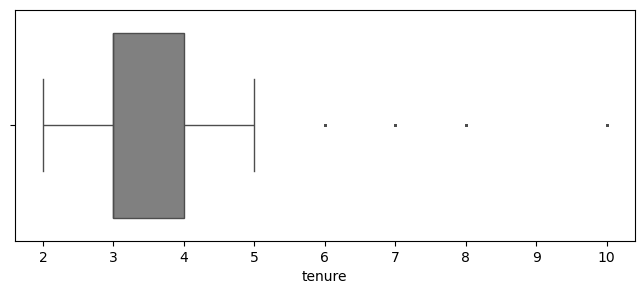

In [31]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 3))
sns.boxplot(df['tenure'], fliersize=1, color='grey', orient='h')
plt.show();


In [32]:
# Determine the number of rows containing outliers
iqr = df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25)

lower_outliers = df['tenure'].quantile(0.25) - 1.5*iqr
upper_outliers = df['tenure'].quantile(0.75) + 1.5*iqr

print(f'Lower-limit: {lower_outliers} \nUpper-limit: {upper_outliers}')

outliers = df[(df['tenure'] < lower_outliers) | (df['tenure'] > upper_outliers)]

print(f'# of outliers: {outliers.shape[0]}')
outliers.head()

Lower-limit: 1.5 
Upper-limit: 5.5
# of outliers: 824


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium


# Visualization & Data Exploration | EDA Continuation

In [33]:
# Get numbers of people who left vs. stayed
print(f"# of employees left/stayed:")
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print(f"# of employees left/stayed:")
print(df['left'].value_counts(normalize=True))

# of employees left/stayed:
left
0    10000
1     1991
Name: count, dtype: int64
# of employees left/stayed:
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


# Data visualizations

In [34]:
df.sample(7)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
8561,0.64,0.60,3,196,3,0,0,0,sales,low
11611,0.65,0.52,2,117,10,1,0,0,support,low
167,0.31,0.54,5,132,5,0,1,0,sales,low
4342,0.56,0.62,4,247,3,0,0,0,product_mng,low
10286,0.54,0.49,4,190,3,0,0,0,technical,medium
10086,0.60,0.50,5,203,3,0,0,0,sales,medium
4547,0.79,0.65,5,228,3,0,0,1,technical,medium


In [36]:
# First plot correction
sns.barplot(data=df, x='left', y='department', hue='left', palette='YlGnBu', ax=axes[0], legend=False)

# Second plot correction
sns.barplot(data=df, x='salary', y='left', hue='salary', palette='YlGnBu', ax=axes[1], legend=False)


<Axes: title={'center': 'Salary vs Left'}, xlabel='salary', ylabel='left'>

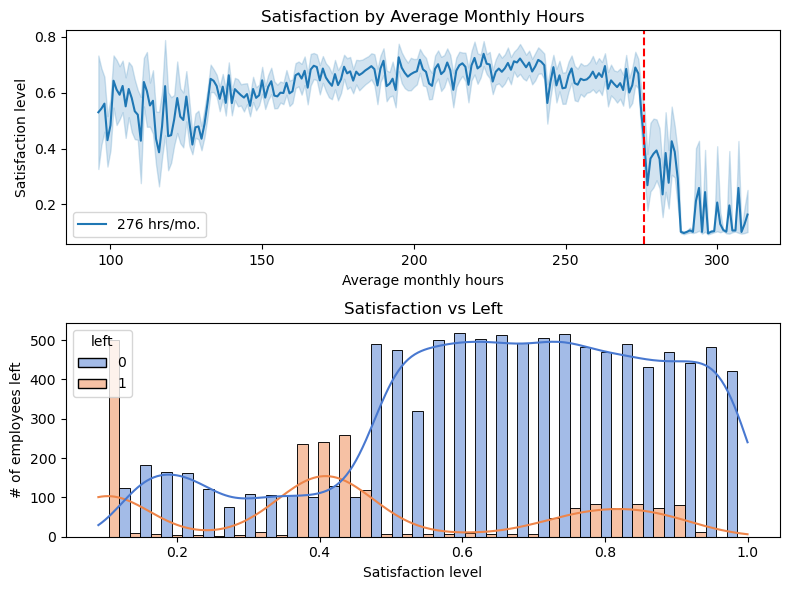

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Plotting satisfaction level by average monthly hours;
sns.lineplot(data=df, x='average_monthly_hours', y='satisfaction_level', ax=axes[0])
axes[0].axvline(276, color='red', linestyle='--')
axes[0].set_title('Satisfaction by Average Monthly Hours')
axes[0].set_xlabel('Average monthly hours')
axes[0].set_ylabel('Satisfaction level')
axes[0].legend(labels=['276 hrs/mo.'])

# Plotting employee attrition count by satisfaction level;
sns.histplot(data=df, x='satisfaction_level', hue='left', kde=True, multiple='dodge', ax=axes[1], palette='muted')
# axes[1].axhline(0.4, color='red', linestyle='--')
axes[1].set_title('Satisfaction vs Left')
axes[1].set_xlabel('Satisfaction level')
axes[1].set_ylabel('# of employees left')

plt.tight_layout();

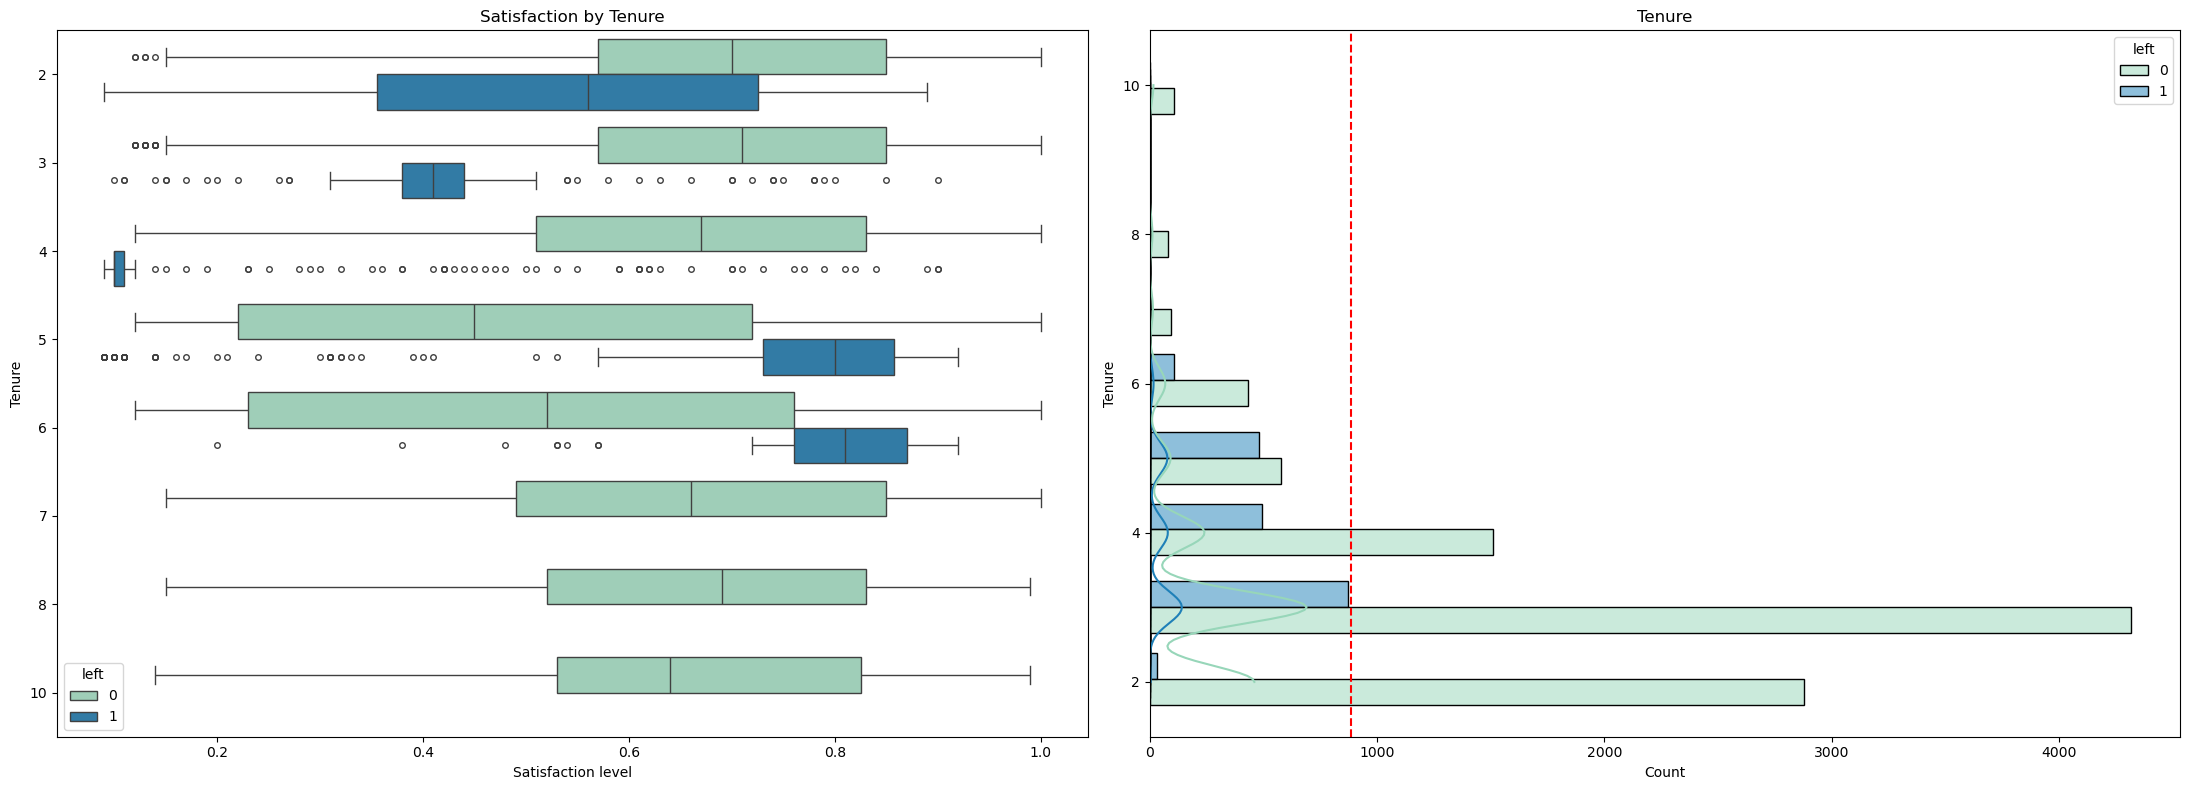

In [40]:
# Creating a plot b/w satisfaction level and tenure & tenure histogram;
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient='h', fliersize=4, palette='YlGnBu', ax=axes[0])
axes[0].set_title('Satisfaction by Tenure')
axes[0].set_xlabel('Satisfaction level')
axes[0].set_ylabel('Tenure')

sns.histplot(data=df, y='tenure', hue='left', kde=True, multiple='dodge', shrink=8, palette='YlGnBu', ax=axes[1])
axes[1].axvline(885, linestyle='--', color='red')
axes[1].set_title('Tenure')
axes[1].set_ylabel('Tenure')

plt.tight_layout();

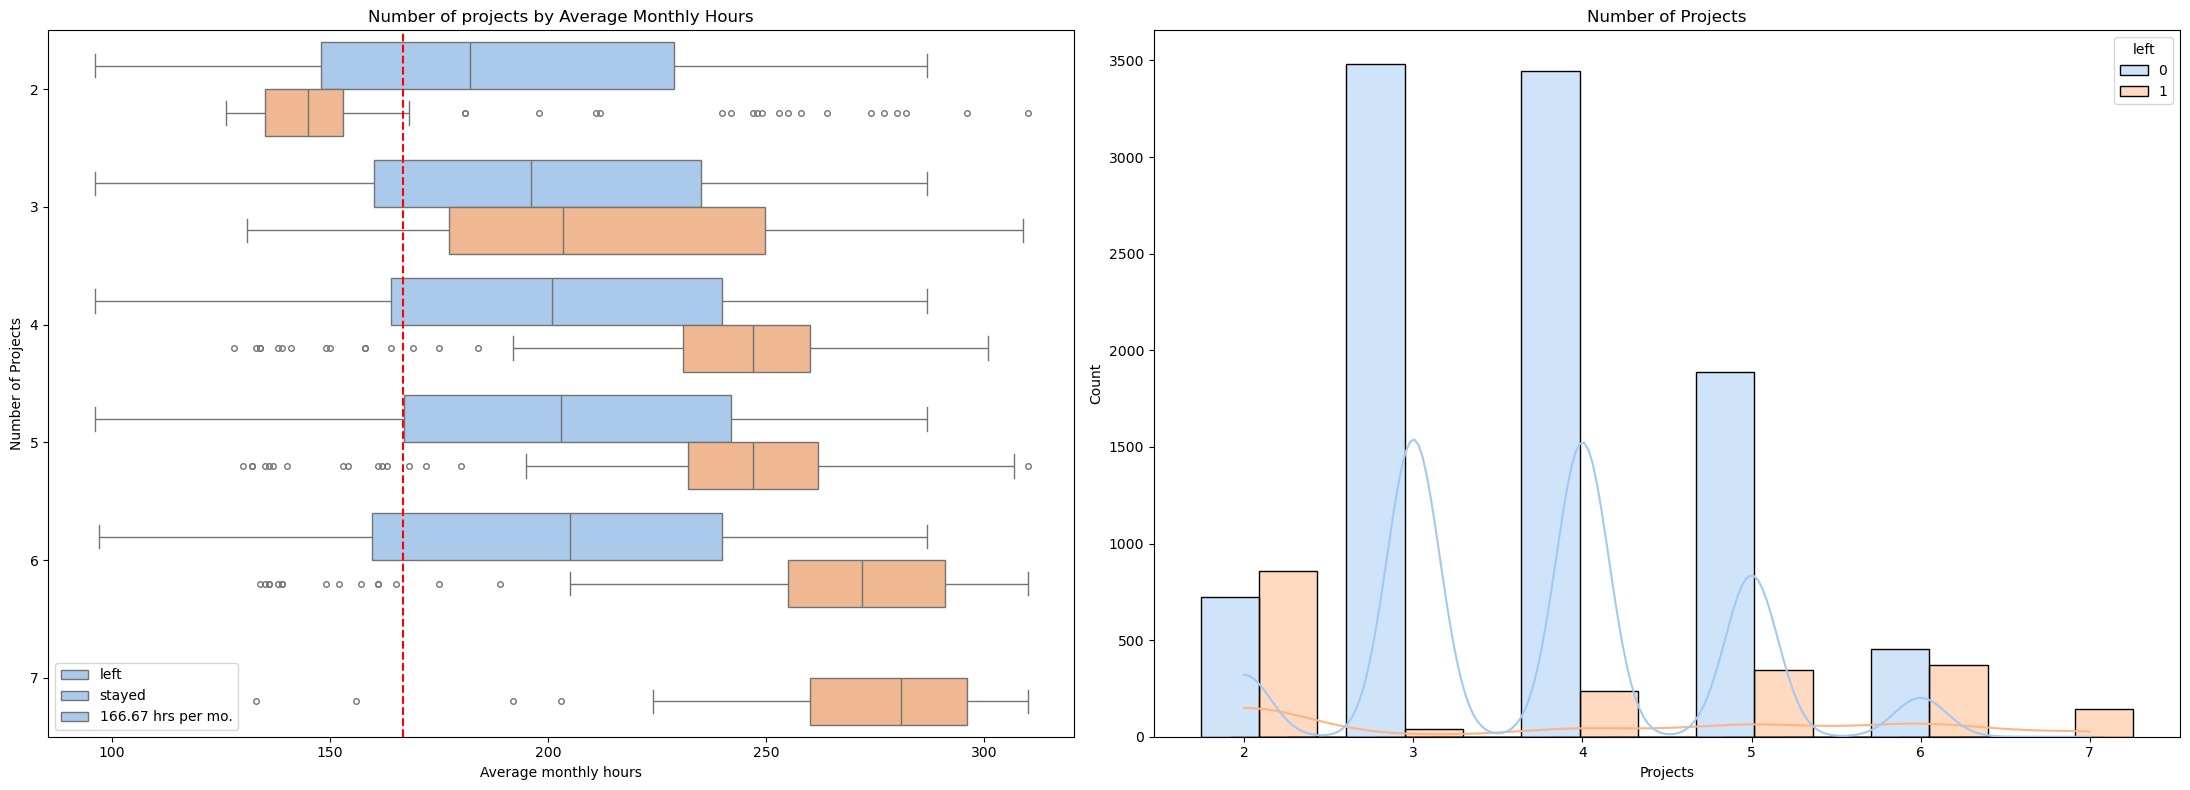

In [41]:
# Plotting figure b/w # of projects by monthly hours; 
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', 
            orient='h', fliersize=4, palette='pastel', 
            ax=axes[0])
axes[0].axvline(166.7, color='red', ls='--')
axes[0].legend(labels=['left', 'stayed', '166.67 hrs per mo.'])
axes[0].set_title('Number of projects by Average Monthly Hours')
axes[0].set_xlabel('Average monthly hours')
axes[0].set_ylabel('Number of Projects')

sns.histplot(data=df, x='number_project', hue='left', kde=True, multiple='dodge', shrink=4, palette='pastel', ax=axes[1])
# axes[1].axvline(885, linestyle='--', color='red')
axes[1].set_title('Number of Projects')
axes[1].set_xlabel('Projects')

plt.tight_layout();

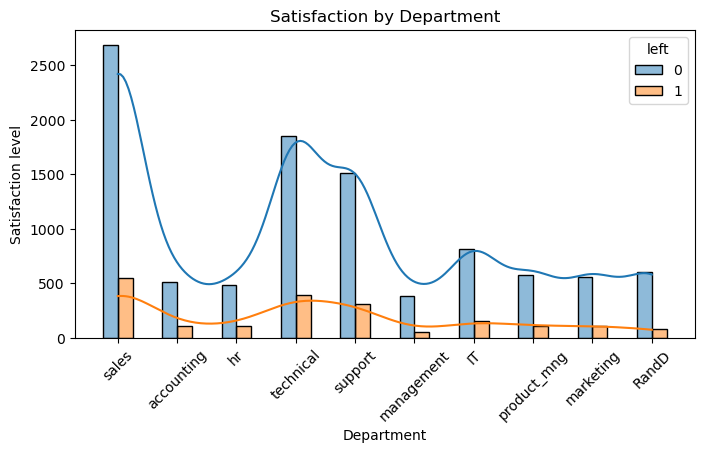

In [42]:
# Satisfaction level between Departments in company;
plt.figure(figsize=(8, 4))

sns.histplot(data=df, x='department', hue='left', kde=True, multiple='dodge', shrink=0.5) # type: ignore
plt.xticks(rotation=45)
plt.title('Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction level')

plt.show();

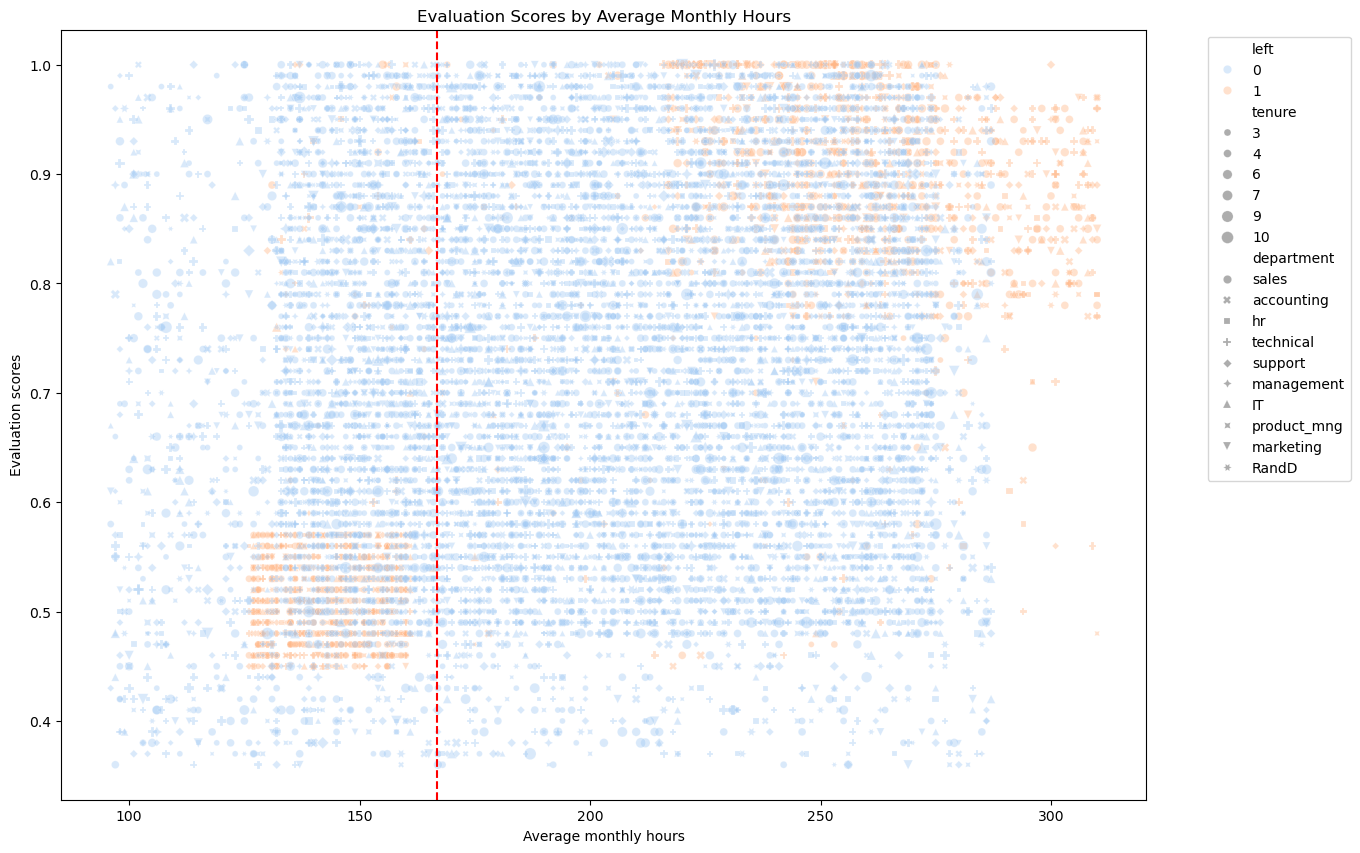

In [43]:
# A plot as needed to see relation among evaluation scores and average monthly hours;
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', 
                hue='left', palette='pastel', 
                size='tenure', 
                style='department', alpha=0.4)
plt.xlabel('Average monthly hours')
plt.ylabel('Evaluation scores')
plt.title('Evaluation Scores by Average Monthly Hours')
plt.axvline(166.7, ls='--', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

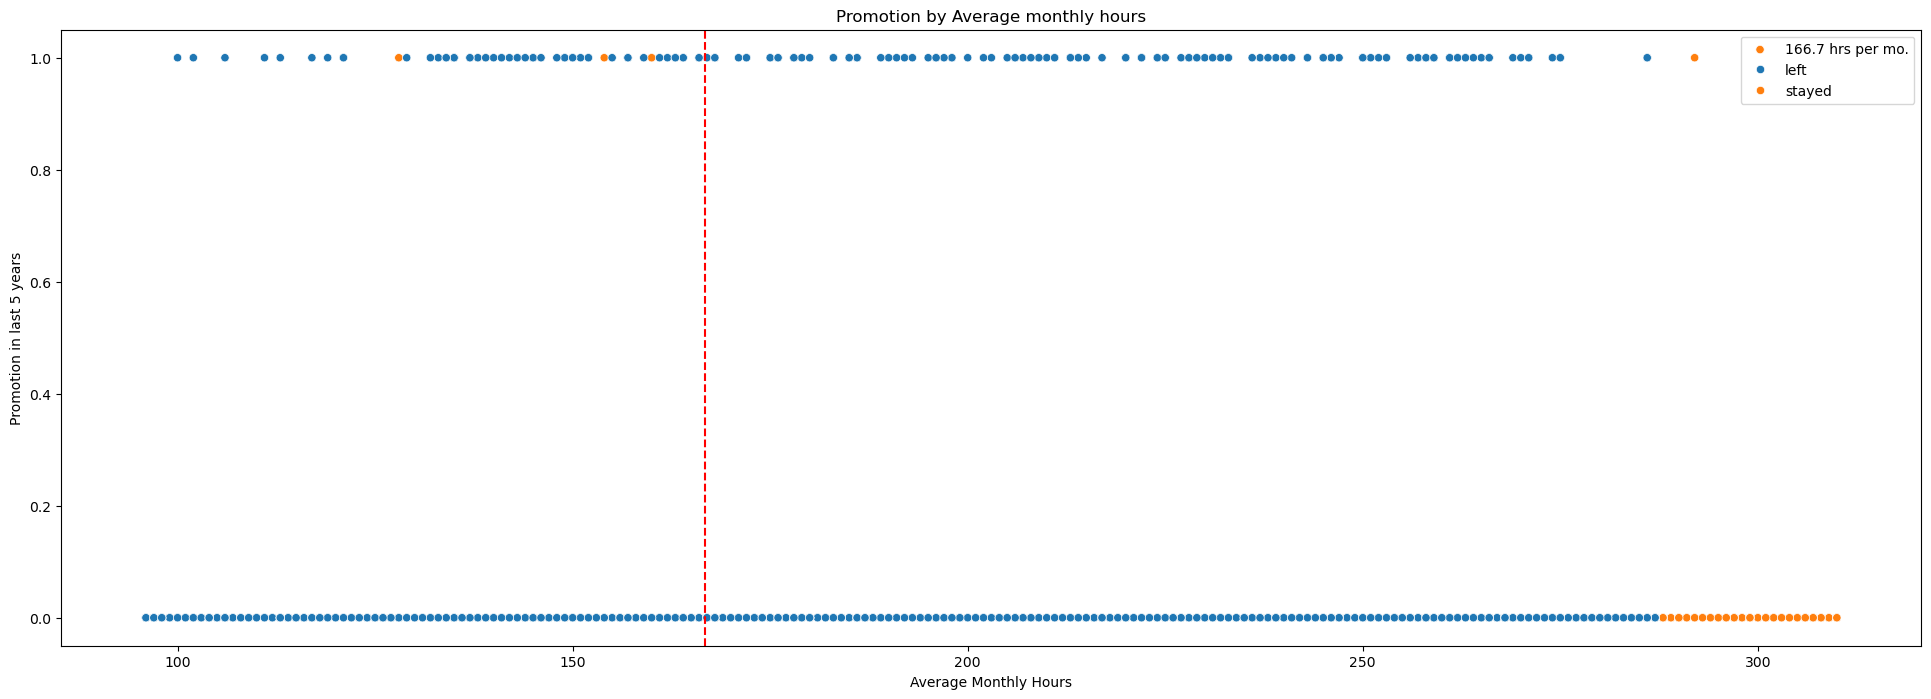

In [44]:
# PLot b/w promotion and attrition;
plt.figure(figsize=(24, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left')
plt.axvline(166.7, ls='--', color='red')
plt.legend(labels=['166.7 hrs per mo.', 'left', 'stayed'])
plt.xlabel('Average Monthly Hours')
plt.ylabel('Promotion in last 5 years')
plt.title('Promotion by Average monthly hours')
plt.show();

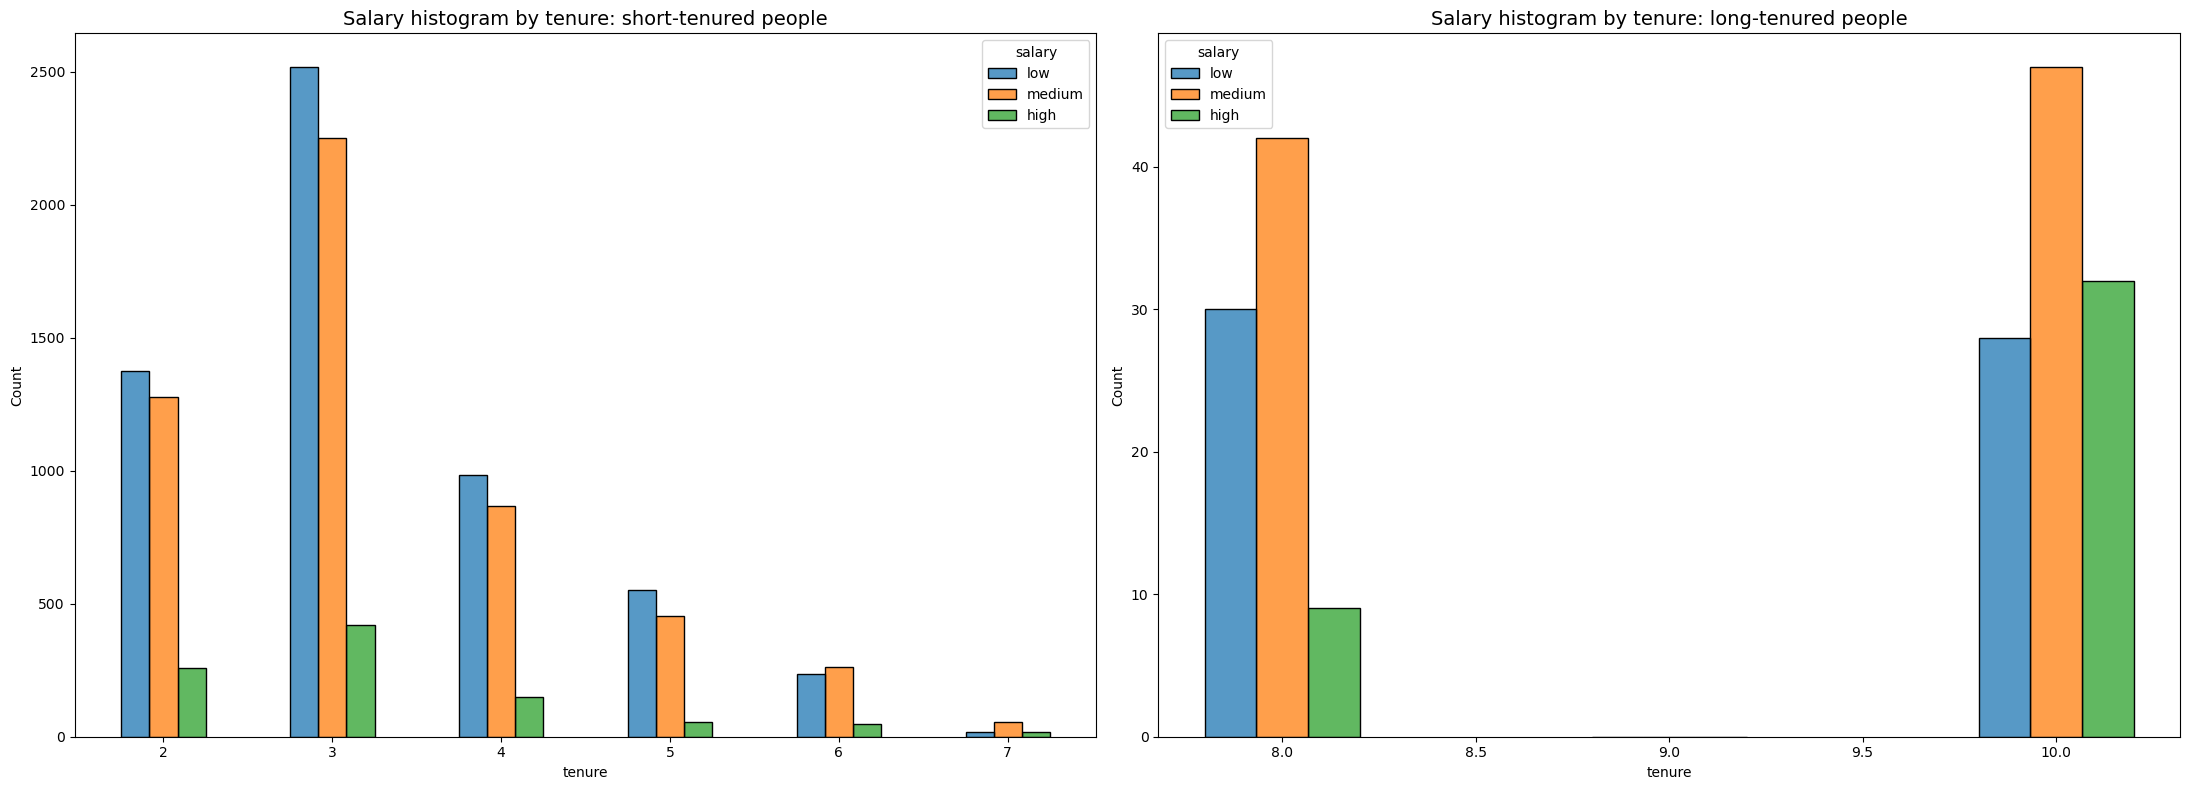

In [46]:
# Creating plot to specify salry range for employees left;
tenure_short = df[df['tenure'] < 8]
tenure_long = df[df['tenure'] > 7]

fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.5, ax=ax[0]) # type: ignore
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.4, ax=ax[1]) # type: ignore
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')
plt.tight_layout();

<Figure size 1600x900 with 0 Axes>

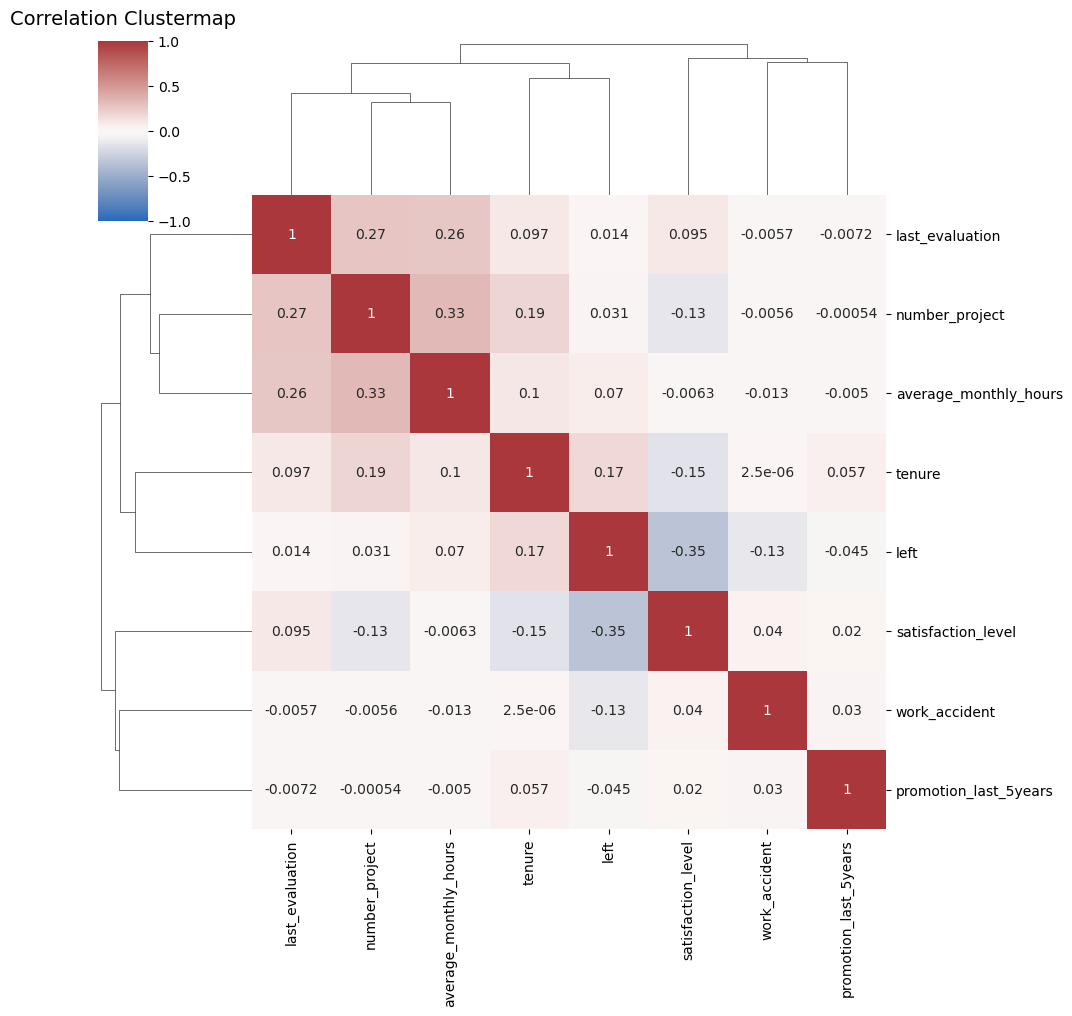

In [47]:
# Corelation among featuresin DataFrame;
plt.figure(figsize=(16, 9))
sns.clustermap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Clustermap', fontdict={'fontsize':14}, pad=12)
plt.show();

# Insights
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# Regression
# Logistic Regression model assumptions

Outcome variable is categorical
Observations are independent of each other
No severe multicollinearity among X variables
No extreme outliers
Linear relationship between each X variable and the logit of the outcome variable
Sufficiently large sample size

In [48]:
df.corr(numeric_only=True)['left']

satisfaction_level      -0.350558
last_evaluation          0.013520
number_project           0.030928
average_monthly_hours    0.070409
tenure                   0.173295
work_accident           -0.125436
left                     1.000000
promotion_last_5years   -0.044657
Name: left, dtype: float64

In [49]:
# Handiling outliers, replacing outlier values with 95th percetile;
df.loc[(df['tenure'] < lower_outliers) | (df['tenure'] > upper_outliers), 'tenure'] = df['tenure'].quantile(.95)

# Verifying if the values were designated;
print(f'Maximum tenure of an employee: {df.tenure.max()}')

Maximum tenure of an employee: 6


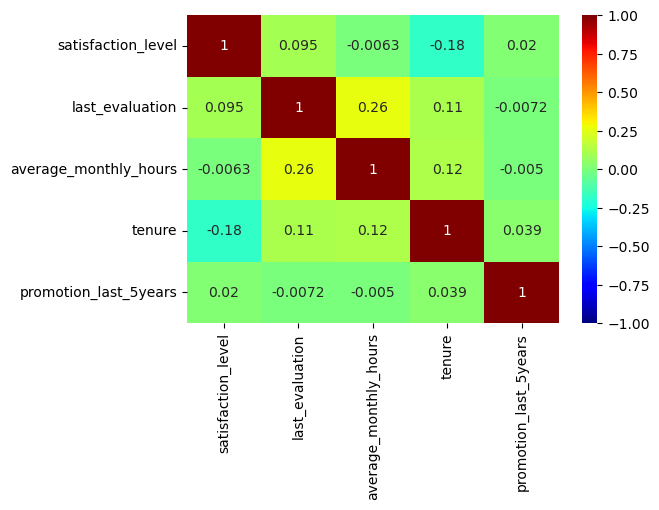

In [50]:
plt.figure(figsize=(6, 4))

sns.heatmap(df.drop(['left', 'number_project', 'work_accident'], axis=1).corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='jet')
plt.show();

In [51]:
# Checking for class imbalance;
print('Proportion of classes in target variable (in %):')
print(round(df.left.value_counts(normalize=True)*100, 2))

Proportion of classes in target variable (in %):
left
0    83.4
1    16.6
Name: proportion, dtype: float64


In [52]:
# Isolating features & target variables;
X = df.drop(['left'], axis=1)
y = df['left'].values

In [53]:
# Encode the `salary` column as an ordinal numeric category
X['salary'] = (
    X['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
X = pd.get_dummies(X, drop_first=False, dtype=int)

# Display the new dataframe
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2) 

In [55]:
# Instantiating 
clf0 = LogisticRegression(random_state=42, max_iter=500)

In [56]:
%%time

clf0.fit(x_train, y_train)

CPU times: total: 625 ms
Wall time: 507 ms


LogisticRegression(max_iter=500, random_state=42)

In [57]:
reg_pred = clf0.predict(x_test)

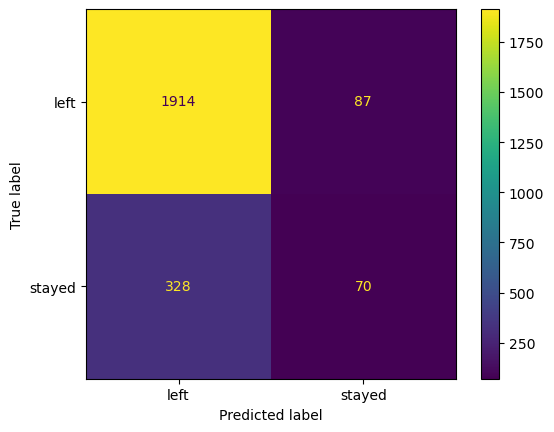

In [58]:
ConfusionMatrixDisplay(confusion_matrix(y_test, reg_pred), display_labels=['left', 'stayed']).plot();

In [59]:
print(classification_report(y_test, reg_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2001
           1       0.45      0.18      0.25       398

    accuracy                           0.83      2399
   macro avg       0.65      0.57      0.58      2399
weighted avg       0.79      0.83      0.79      2399



In [60]:
# Fetching probablities for the predicts and first five instances;
reg_prob = clf0.predict_proba(x_test)
reg_prob[:5]

array([[0.97773021, 0.02226979],
       [0.6475852 , 0.3524148 ],
       [0.51390023, 0.48609977],
       [0.9475664 , 0.0524336 ],
       [0.43891442, 0.56108558]])

In [61]:
print(f'''Accuracy Score: {metrics.accuracy_score(y_test, reg_pred)}
      \nPrecision Score: {metrics.precision_score(y_test, reg_pred)}
      \nRecall Score: {metrics.recall_score(y_test, reg_pred)}
      \nF1 Score: {metrics.f1_score(y_test, reg_pred)}
      \nAUC: {roc_auc_score(y_test, reg_pred)}''')

Accuracy Score: 0.8270112546894539
      
Precision Score: 0.445859872611465
      
Recall Score: 0.17587939698492464
      
F1 Score: 0.25225225225225223
      
AUC: 0.5662005680576797


# Model Building | Results and Evaluation
# Identify the type of prediction task.
Supervised binary-classification task

# Identify the types of models most appropriate for this task.
Logistic Regression, Decision Tree Classifier, Random Forest Classifier, XG Boost Classifier, Naive Bayes

# Featuring Engineering

In [62]:
# Getting descriptive statistics;
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.307814,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.134891,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.000000


In [63]:
# Handling outliers by replacing outlier values with 95th percentile;
df.loc[(df['tenure'] < lower_outliers) | (df['tenure'] > upper_outliers), 'tenure'] = df['tenure'].quantile(.95)


     

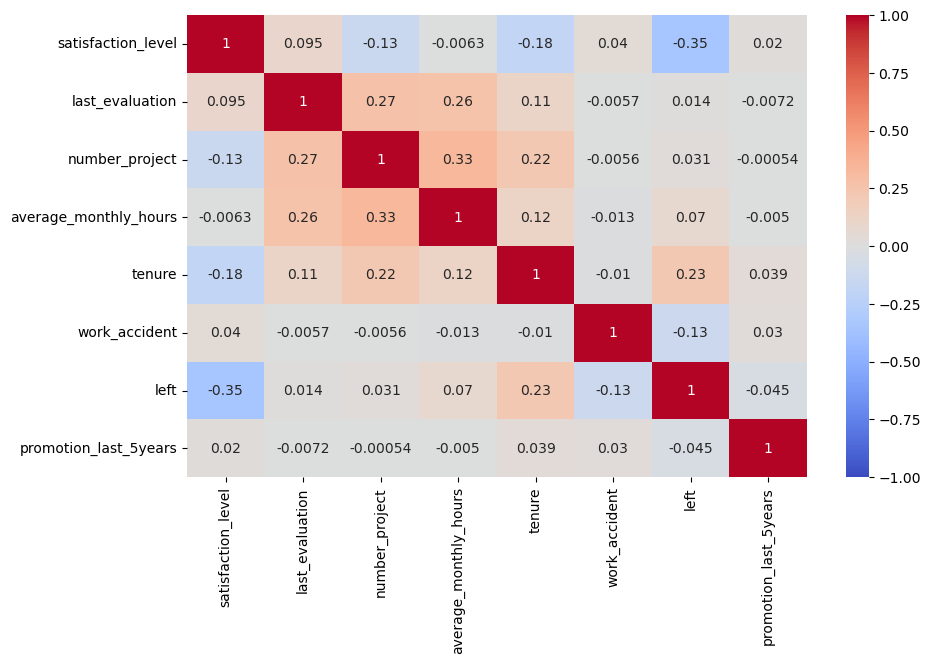

In [64]:
# Observing correlations between the features;
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show();


In [66]:
df.loc[:, 'avg_hours_per_project'] = round(df['average_monthly_hours'] / df['number_project'], 2)


In [67]:
# Subsetting data frame;
df = df[['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'tenure', 
         'avg_hours_per_project', 'department', 'salary', 'left']]

In [68]:
df.sample(14)

,satisfaction_level,last_evaluation,average_monthly_hours,tenure,avg_hours_per_project,department,salary,left
7171,0.76,0.60,140,2,46.67,RandD,low,0
3388,1.00,0.66,238,4,59.50,accounting,low,0
1671,0.42,0.54,143,3,71.50,product_mng,high,1
3880,0.83,0.54,219,3,54.75,product_mng,medium,0
3406,0.60,0.63,192,3,48.00,support,low,0
7165,0.91,0.56,241,2,60.25,IT,low,0
1659,0.77,0.85,276,5,55.20,support,medium,1
10331,0.54,0.68,144,5,48.00,sales,medium,0
1844,0.37,0.51,154,3,77.00,sales,low,1
11546,0.24,0.56,281,6,70.25,sales,medium,0


In [69]:
x = df.drop('left', axis=1)
y = df['left']

In [70]:
#Performing train test split along with devset;
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
x_tr.head()


,satisfaction_level,last_evaluation,average_monthly_hours,tenure,avg_hours_per_project,department,salary
10912,0.52,0.57,270,3,90.00,RandD,low
9242,0.80,0.62,216,2,54.00,marketing,medium
6818,0.87,0.92,141,3,35.25,sales,low
7239,0.83,0.99,184,3,46.00,IT,low
5691,0.74,0.75,149,3,37.25,technical,low


In [71]:
# Creating pipelines in order to execute transformations before modeling;
tnsf1 = ColumnTransformer(
    transformers=[
        ('sal_enc', OrdinalEncoder(categories=[['low', 'medium', 'high']]), [6]), # type: ignore
        ('dept_enc', OneHotEncoder(drop='first'), [5]),
        ('scale', StandardScaler(), slice(2, 5))
    ],
    remainder='passthrough'
)


In [72]:
pipe = Pipeline([
    ('tnsf1', tnsf1)
])

pipe.fit(x_tr)


Pipeline(steps=[('tnsf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sal_enc',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  [6]),
                                                 ('dept_enc',
                                                  OneHotEncoder(drop='first'),
                                                  [5]),
                                                 ('scale', StandardScaler(),
                                                  slice(2, 5, None))]))])

In [73]:
X_train = pipe.transform(x_tr)
X_val = pipe.transform(x_val)
X_test = pipe.transform(x_test)

# Modeling
# Tree-Based Approach-Round I:
# Decision Tree

In [74]:
# Instantiating decision tree classifier;
decision_tree = DecisionTreeClassifier(random_state=42)

In [75]:
# Building/preparing parameter grids for cross-validation;
dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 8, None],
    'min_samples_split': [50, 100, 150, 200],
    'max_features': [0.5, 0.7]
}

scores = ('recall', 'precision', 'accuracy', 'f1')

# Instantiating grid search for best parameters;
clf = GridSearchCV(decision_tree, param_grid=dt_parameters, scoring=scores, n_jobs=-1, verbose=1, cv=10, refit='f1')


     

In [76]:
%%time

# Fitting model on training set/data;
# clf.fit(X_train, y_tr)


CPU times: total: 0 ns
Wall time: 0 ns


In [77]:
# Instantiating utiliy function for pickle dumping our fitted model;
def dump_model(model, filename:str):
    
    '''
    The utility function saves model as binary file,
    in order to save the time for the next instance.
    
    Parameters:
    
    path: The path of folder where model will be saved.
    model: The model object you want to pickle.
    filename: The name of binary file in which the model will be saved.
    '''
    
    with open(filename + '.pickle', 'wb') as to_write:
        pickle.dump(model, to_write)

In [78]:
# Instantiating utiliy function for us to load and use our pickled model;
def load_model(filename:str):
    '''
    The utility function saves model as binary file,
    in order to save the time for the next instance.
    
    Parameters:
    
    path: The path of folder where model will be saved.
    model: The model object you want to pickle.
    filename: The name of binary file in which the model will be saved.
    '''
    
    with open(filename + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    
    return model

In [79]:
# Saving Decision-Tree Classifier to binary file;
# dump_model(clf, 'DecisionTreeClassifier')

In [82]:
from sklearn.model_selection import train_test_split

# Assuming `X` is your feature DataFrame and `y` is your label Series:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
from sklearn.tree import DecisionTreeClassifier
import pickle

model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # ✅ This will now work

with open('DecisionTreeClassifier.pickle', 'wb') as f:
    pickle.dump(model, f)


In [84]:
print(X_train.shape)
print(y_train.shape)


(9592, 18)
(9592,)


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create base model
clf = DecisionTreeClassifier()

# Grid search
dt = GridSearchCV(clf, param_grid, cv=5)
dt.fit(X_train, y_train)

# Now this will work:
print("Best score:", dt.best_score_)
print("Best parameters:", dt.best_params_)
print("Best model:", dt.best_estimator_)


Best score: 0.9816513532150097
Best parameters: {'max_depth': 10, 'min_samples_split': 10}
Best model: DecisionTreeClassifier(max_depth=10, min_samples_split=10)


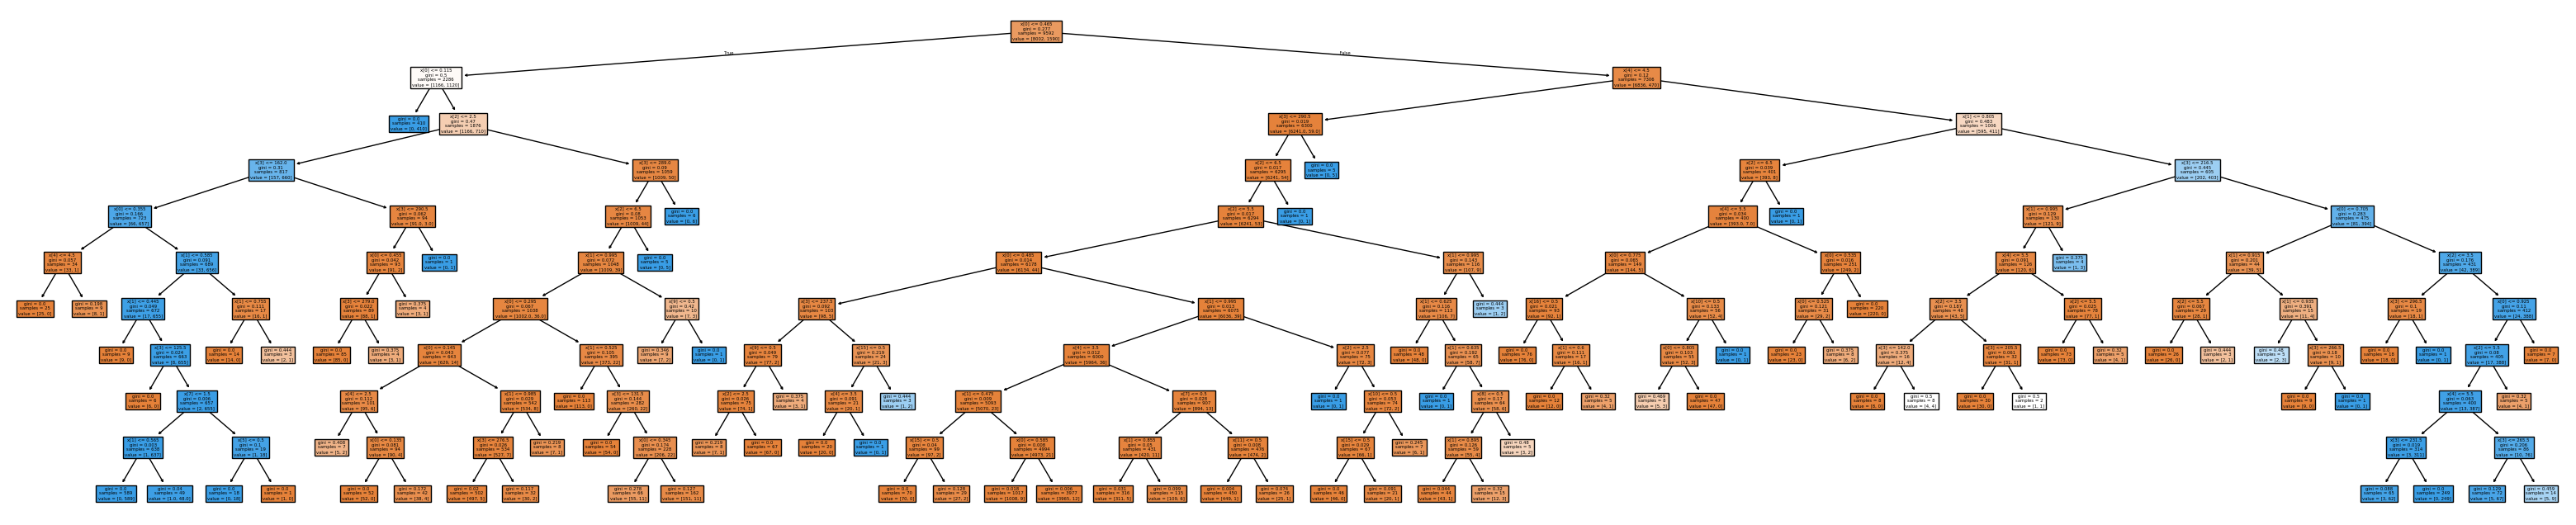

In [87]:
# Plotting full tree growth;
plt.figure(figsize=(40, 8))

plot_tree(dt.best_estimator_, filled=True)
plt.show();


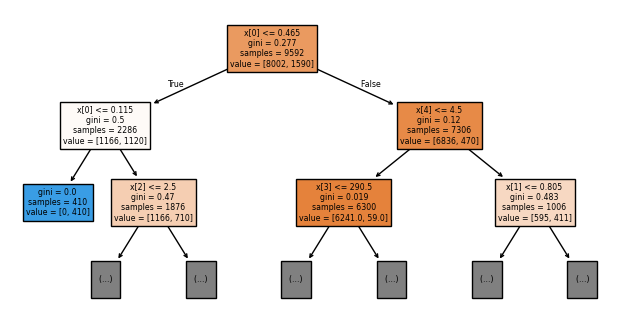

In [88]:
# Plotting the split details for tree;
plt.figure(figsize=(8, 4))

plot_tree(dt.best_estimator_, max_depth=2, filled=True)
plt.show();

In [93]:
# Ensure both are DataFrames
if isinstance(X_val, np.ndarray):
    X_val = pd.DataFrame(X_val)

# Align column names if possible
X_val.columns = X_train.columns[:X_val.shape[1]]  # Assign only as many as X_val has

# Reorder or align columns (optional, depending on later usage)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)  # or use np.nan

if isinstance(X_val, np.ndarray):
    X_val = pd.DataFrame(X_val)

# Add missing columns with default values (e.g., 0)
for col in X_train.columns:
    if col not in X_val.columns:
        X_val[col] = 0

# Reorder columns to match
X_val = X_val[X_train.columns]


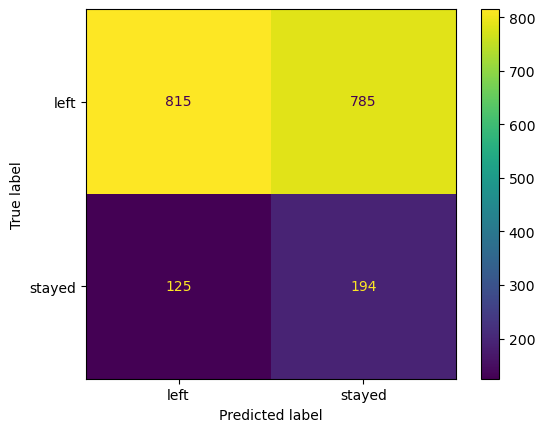

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you already trained a Decision Tree classifier, e.g.:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)

# Make predictions on the validation set
dt_pred = dt.predict(X_val)

# Create confusion matrix
cm = confusion_matrix(y_val, dt_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['left', 'stayed'])
disp.plot()


In [95]:

# Creating utility function to record test scores on devset;
def test_scores(model:str, y_true, y_pred):
    
    '''
    Returns the scores form the predictions
    made on test/dev-set.
    
    Parameters:
    
    model: The name of model.
    y_true: The true value of label.
    y_pred: Predictions from model.
    '''
    
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    
    table = pd.DataFrame({
        'model': [model],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1': [f1],
        'AUC': [auc]
    })
    
    return table



In [96]:
test_table = test_scores('Decision Tree Classifier', y_val, dt_pred)
test_table

,model,accuracy,precision,recall,f1,AUC
0,Decision Tree Classifier,0.525795,0.198161,0.60815,0.298921,0.558763


# Ensembling Approach-Round I:
# Bagging: Random Forest

In [97]:
# Instantiating random forest classifier;
random_forest = RandomForestClassifier(random_state=42)

In [98]:
# Building/preparing parameter grids for cross-validation;
rf_parameters = {
    'n_estimators': [200, 400, 500],
    'max_samples': [0.25, 0.30, 0.5],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 8, None],
    'min_samples_split': [50, 100, 150],
    'max_features': [0.5, 0.7]
}

scores = ('recall', 'precision', 'accuracy', 'f1')

# Instantiating grid search for best parameters;
clf_rf = GridSearchCV(random_forest, param_grid=rf_parameters, scoring=scores, n_jobs=-1, verbose=1, cv=5, refit='f1')


     

In [99]:
%%time

# Fitting model on traing data;
# clf_rf.fit(X_train, y_tr)


CPU times: total: 0 ns
Wall time: 0 ns


In [100]:
# Saving Random Forest Classifier to binary file;
# dump_model(clf_rf, 'RandomForest')

In [102]:
import os
import pickle

def load_model(filename: str):
    '''
    This function loads a previously saved model from a pickle file.
    '''
    if not os.path.exists(filename + '.pickle'):
        print(f"File {filename}.pickle not found. Please check the path.")
        return None  # or you can train the model again if needed
    
    with open(filename + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

rf = load_model('RandomForest')
if rf is None:
    # Handle the case where the model couldn't be loaded
    print("Model loading failed. Proceeding with training.")


File RandomForest.pickle not found. Please check the path.
Model loading failed. Proceeding with training.


In [103]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Example of training a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Save the trained model
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(rf_model, f)


In [105]:
# Check if the model is loaded successfully
if rf is not None:
    # Print the best score and best parameters
    print(f"Best score: {rf.best_score_}")
    print(f"Best parameters: {rf.best_estimator_}")
else:
    print("Model loading failed. Please check the path to the model file.")


Model loading failed. Please check the path to the model file.


In [107]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Train the model again if not found
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Save the trained model
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(rf_model, f)
    
# Now you can use rf_model to make predictions
rf_pred = rf_model.predict(X_val)
print(f"Predictions: {rf_pred}")


Predictions: [0 0 0 ... 0 0 0]


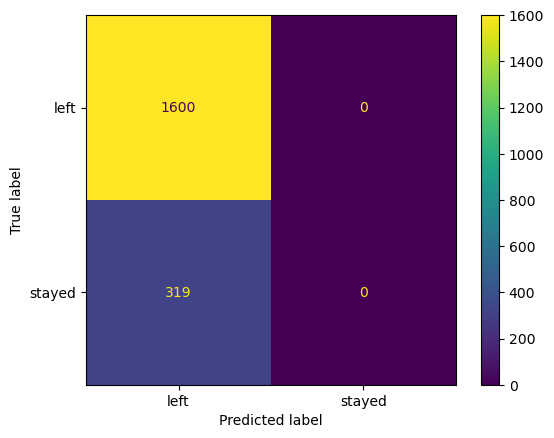

In [108]:
# Creating Confustion Matrix;
cm = confusion_matrix(y_val, rf_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['left', 'stayed']) # type: ignore
disp.plot();

In [109]:
# test_table = pd.concat([test_table, test_scores('Random Forest Classifier', y_val, rf_pred)], axis=0).reset_index(drop=True)
test_table

,model,accuracy,precision,recall,f1,AUC
0,Decision Tree Classifier,0.525795,0.198161,0.60815,0.298921,0.558763


# Developing model after taking into account Data Leakage
It might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

You could proceed by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature overworked. It will be a binary variable.

# Post-Feature Engineering

In [110]:
# Dropping Satisfaction level for preventing the data to be exact same;
x = x.drop('satisfaction_level', axis=1)

In [111]:
# Inspecting max and min average monthly hours values;
print('Max hours:', df['average_monthly_hours'].max())
print('Min hours:', df['average_monthly_hours'].min())

Max hours: 310
Min hours: 96


In [112]:
# Creating new column named 'OVERWORKED';
x['overworked'] = (x['average_monthly_hours'] > 176).astype(int)
x = x.drop('average_monthly_hours', axis=1)

In [113]:
# Splitting data into training, dev or validation, and test set; 
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_tr_new, x_val_new, y_tr_new, y_val_new = train_test_split(x_train_new, y_train_new, test_size=0.2, stratify=y_train, random_state=42)
x_tr_new.head()

,last_evaluation,tenure,avg_hours_per_project,department,salary,overworked
9252,0.55,3,41.20,sales,low,1
1489,0.46,3,80.00,technical,low,0
10451,0.56,2,46.20,RandD,low,1
2369,0.69,3,61.25,management,medium,1
5631,0.44,4,28.50,technical,medium,0


In [114]:
# Creating transformers to transform categorical variable in to numerical;
tnsf = ColumnTransformer(
    transformers=[
        ('sal_enc', OrdinalEncoder(categories=[['low', 'medium', 'high']]), [4]), # type: ignore
        ('dept_enc', OneHotEncoder(drop='first'), [3]),
        ('scale', StandardScaler(), [1, 2])
    ],
    remainder='passthrough'
)


In [115]:
# Instantiating pipelines to smoothen the workflow and transformations;
pipe_post = Pipeline([
    ('tnsf', tnsf)
])

pipe_post.fit(x_tr_new)

Pipeline(steps=[('tnsf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sal_enc',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  [4]),
                                                 ('dept_enc',
                                                  OneHotEncoder(drop='first'),
                                                  [3]),
                                                 ('scale', StandardScaler(),
                                                  [1, 2])]))])

In [116]:
X_train_new =pipe_post.transform(x_tr_new) 
X_val_new = pipe_post.transform(x_val_new)
X_test_new = pipe_post.transform(x_test_new)

# Tree-Based Approach- Round II:
# Decision Tree

In [117]:
# Instantiating decision tree classifier;
decision_tree2 = DecisionTreeClassifier(random_state=42)

In [118]:
# Building/preparing parameter grids for cross-validation;
dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 8, None],
    'min_samples_split': [50, 100, 150, 200],
    'max_features': [0.5, 0.7]
}

scores = ('recall', 'precision', 'accuracy', 'f1')

# Instantiating grid search for best parameters;
clf2 = GridSearchCV(decision_tree2, param_grid=dt_parameters, scoring=scores, n_jobs=-1, verbose=1, cv=10, refit='f1')


     

In [119]:
%%time

# Fitting model to training set;
clf2.fit(X_train_new, y_tr_new)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
CPU times: total: 875 ms
Wall time: 10.5 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'max_features': [0.5, 0.7],
                         'min_samples_split': [50, 100, 150, 200]},
             refit='f1', scoring=('recall', 'precision', 'accuracy', 'f1'),
             verbose=1)

In [120]:
# dump_model(clf2, 'DecisionTreeClassifier_2')

In [121]:
dt2 = load_model('DecisionTreeClassifier_2')

File DecisionTreeClassifier_2.pickle not found. Please check the path.


In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier  # Example of an estimator
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define an estimator (e.g., DecisionTreeClassifier)
estimator = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}

# Set up GridSearchCV with the estimator and parameter grid
dt2 = GridSearchCV(estimator, param_grid)

# Fit the grid search to the training data
dt2.fit(X_train, y_train)

# Access the best score and estimator
print("Best score:", dt2.best_score_)
print("Best estimator:", dt2.best_estimator_)


Best score: 0.9428571428571428
Best estimator: DecisionTreeClassifier(max_depth=5, min_samples_split=10)


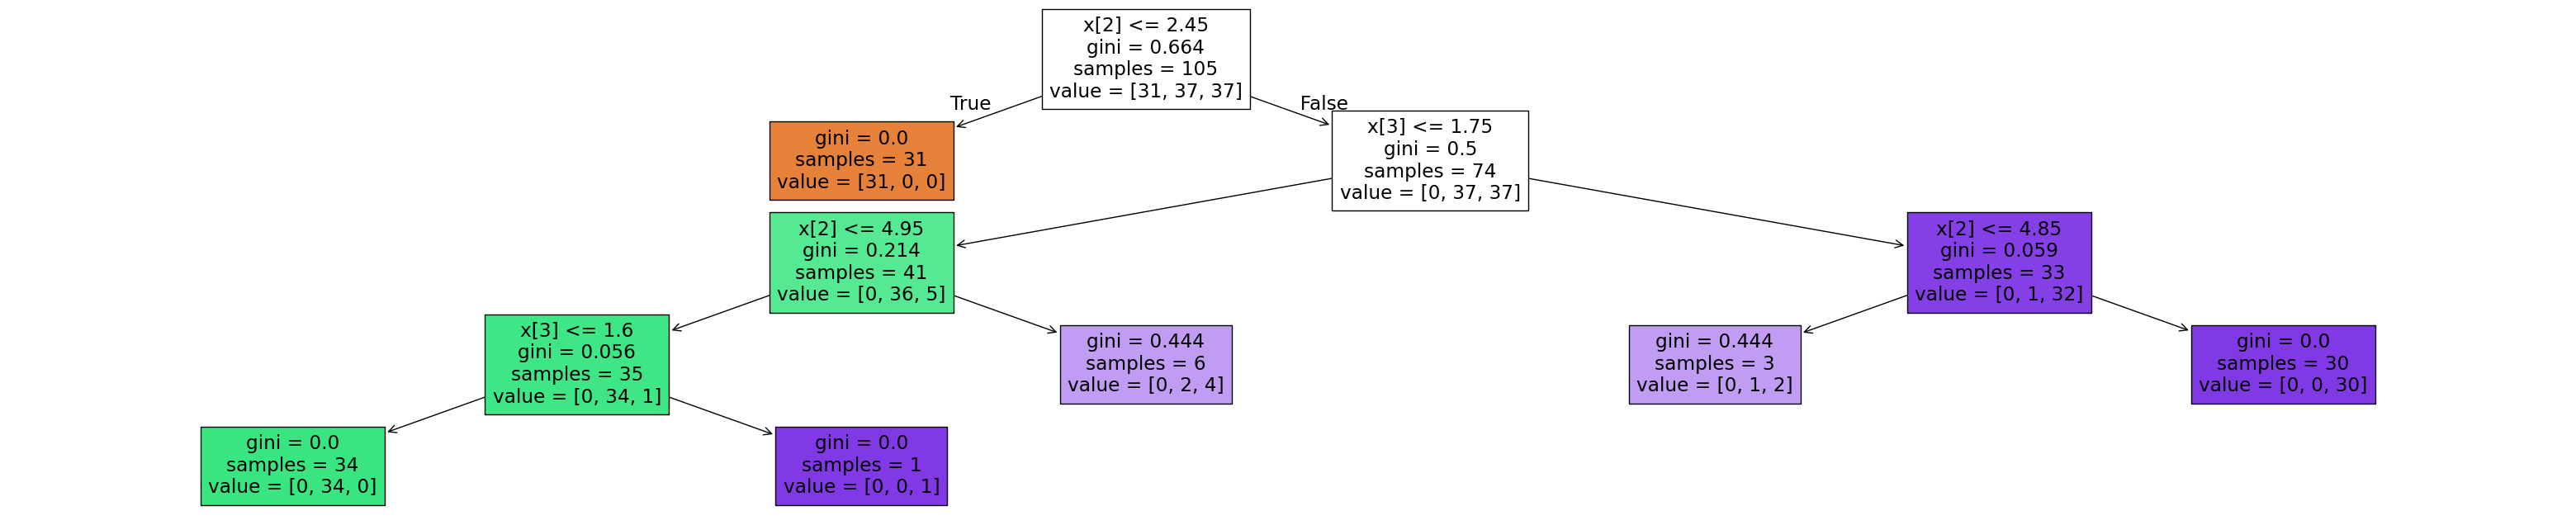

In [125]:
# Plotting full tree growth;
plt.figure(figsize=(40, 8))

plot_tree(dt2.best_estimator_, filled=True)
plt.show();

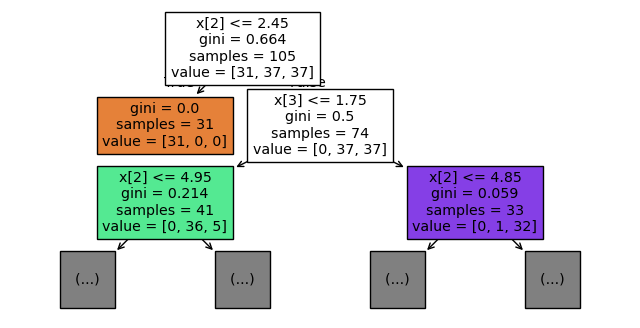

In [126]:
# Plotting the split details for tree;
plt.figure(figsize=(8, 4))

plot_tree(dt2.best_estimator_, max_depth=2, filled=True)
plt.show();

In [128]:
print(X_train.shape)  # For training data
print(X_val_new.shape)  # For validation data


(105, 4)
(1919, 14)


In [129]:
def confusion_matrix_disp(y_true, y_pred, label=[0, 1]):
    
    '''
    The utility function returns the confusion matrix plot.
    
    Parameters:
    
    y_true: True values for labels.
    y_pred: Predicted values from model.
    labels: labels to be diplayed in the confusion matrix plot.
    '''
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=label)
    
    disp.plot();

In [134]:
print(X_val_new.shape)


(1919, 14)


In [137]:
# test_table = pd.concat([test_table, test_scores('DecisionTreeClassifier (II)', y_val_new, dt2_pred)], axis=0).reset_index(drop=True)
test_table

,model,accuracy,precision,recall,f1,AUC
0,Decision Tree Classifier,0.525795,0.198161,0.60815,0.298921,0.558763


# pacE: Execute Stage
Interpret model performance and results
Share actionable steps with stakeholders
# Recall evaluation metrics
AUC is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
Precision measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
Accuracy measures the proportion of data points that are correctly classified.
F1-score is an aggregation of precision and recall.
# Reflect on these questions as you complete the executing stage.
What key insights emerged from your model(s)?
What business recommendations do you propose based on the models built?
What potential recommendations would you make to your manager/company?
Do you think your model could be improved? Why or why not? How?
Given what you know about the data and the models you were using, what other questions could you address for the team?
What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Do you have any ethical considerations in this stage?

# Results and Evaluation
Interpret model
Evaluate model performance using metrics
Prepare results, visualizations, and actionable steps to share with stakeholders
# Summary of model results
# Logistic Regression

The logistic regression model achieved a precision of 79%, recall of 83%, f1-score of 79% (all weighted averages), and accuracy of 83%. Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 91.8%, precision of 89.0%, recall of 85.5%, f1-score of 87.6%, and accuracy of 95.8%, on the val set. The random forest modestly outperformed the decision tree model.

# Conclusion, Recommendations
The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.